# SP via class imbalance

Example [test scores](https://www.brookings.edu/blog/social-mobility-memos/2015/07/29/when-average-isnt-good-enough-simpsons-paradox-in-education-and-earnings/)

SImpson's paradox can also occur due to a class imbalance, where for example, over time the value of several differnt subgroups all increase, but the totla average decreases over tme.   This is also am mportant tpe to catch because this can inicate a large class disparity beased on the subgrouping variable.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from mlsim import sp_plot
import seaborn as sns

For pay, we can actually have the count of some positions decline 

In [62]:
t = np.linspace(0,50,11)
count_rate = np.asarray([-2.5,-3,5.5,-10])
count_pow = np.asarray([1.1,1.0,1.15,.8])
count_0 = np.asarray([775,650,350,500])
count = np.asarray([count_0 + count_rate*(t_i**count_pow) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*4).T
score_rate = np.asarray([.0010, .00085, .00015,.00075])
score_0 = [.21,.26,.47,.34]
scores_group = np.asarray([score_0 - score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)


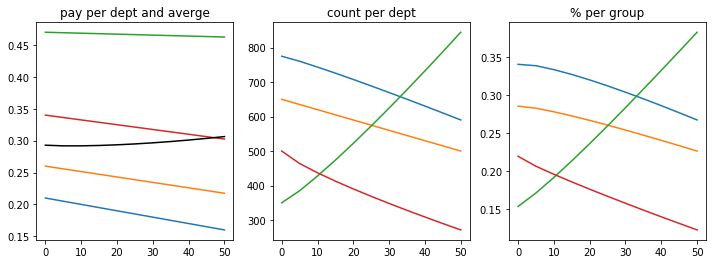

In [63]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(t,scores_group,)
plt.plot(t,total_score,'k', label ='average')
plt.title('pay per dept and averge');

plt.subplot(1,3,2)
plt.plot(t,count)
plt.title('count per dept');

plt.subplot(1,3,3)
plt.plot(t,share)
plt.title('% per group');

In [64]:
total_score

array([0.29285714, 0.29182082, 0.29185071, 0.29243545, 0.2934555 ,
       0.29484967, 0.29657889, 0.29861506, 0.30093628, 0.30352454,
       0.30636445])

The above is occuring in aggregate data, we should generate and aim to detect from the individual measurements. So we can expand the above generator.  We'll use the group score and counts to draw the indivdual rows of our table. 

In [65]:
roles = [ 'A',  'B','C', 'D',]

shareM = [.28,.55,.625,.75]

In [66]:
100/360

0.2777777777777778

In [87]:
dat = [[t_t+1970,np.round(np.random.choice([1,0],p=[sg,1-sg]),decimals=2),g,np.random.choice(['M','F'],p=[p_m,1-p_m]) ]
            for sg_t, c_t,t_t in zip(scores_group,count,t) # per time 
           for sg,c,g,p_m in zip(sg_t,c_t,roles,shareM) 
           for i in range(int(c))] # per person per group

In [88]:
df = pd.DataFrame(data=dat,columns = ['year','decision','department','gender'])

In [89]:
df.head()

,year,decision,department,gender
0,1970.0,0,A,F
1,1970.0,1,A,M
2,1970.0,0,A,F
3,1970.0,0,A,M
4,1970.0,1,A,F


In [90]:
df.groupby(['department','gender'])['decision'].mean().unstack()

gender,F,M
department,,
A,0.182303,0.194221
B,0.241440,0.239977
C,0.462356,0.469337
D,0.323017,0.315362


In [93]:
p_flip = .15
flip_rate = {0: np.random.choice([0,1],p= [1-p_flip,p_flip]),
            1:1}
altered = {'F':lambda a: flip_rate[a] , 'M':lambda a: a}
def g_raise(row):
    return altered[row['gender']](row['decision'])

df['decision'] = df.apply(g_raise,axis=1)

In [94]:
df.groupby(['department','gender'])['decision'].mean().unstack()

gender,F,M
department,,
A,0.182303,0.194221
B,0.241440,0.239977
C,0.462356,0.469337
D,0.323017,0.315362


/home/smb/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


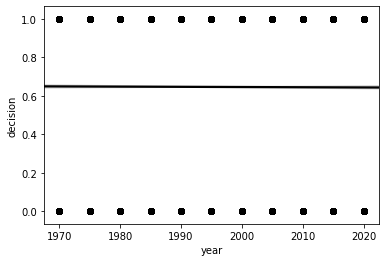

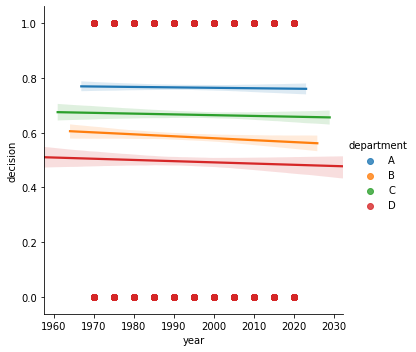

In [79]:
sns.regplot('year','decision',data=df,color='k')
sns.lmplot('year','decision',data =df,hue='department')


/home/smb/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


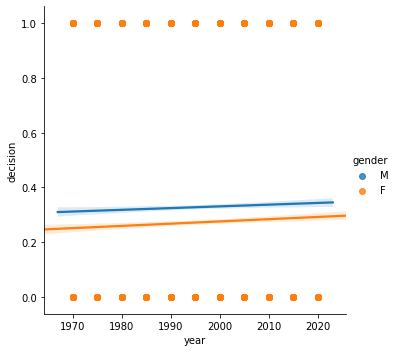

In [41]:
sns.lmplot('year','decision',data =df,hue='gender')

In [42]:
df.groupby(['department','gender'])['decision'].mean().unstack()

gender,F,M
department,,
A,0.189515,0.189856
B,0.239045,0.252132
C,0.466191,0.481565
D,0.341699,0.310042


In [44]:
df.groupby(['gender'])['decision'].mean()

gender
F    0.271726
M    0.327794
Name: decision, dtype: float64

In [310]:
df.groupby(['year','gender','department'])['pay'].mean().unstack()

department     Management        R&D      Sales    Support
year   gender                                             
1970.0 F        48.903719  35.836718  27.999559  22.949790
       M        47.177642  33.952439  26.241352  21.039212
1975.0 F        48.799008  35.480885  27.513027  22.429088
       M        47.042717  33.427829  25.741085  20.716934
1980.0 F        48.834000  35.359123  27.147117  21.977519
       M        46.958641  33.383075  25.239823  19.895714
1985.0 F        48.880585  35.235929  26.736703  21.634082
       M        46.877020  32.867458  24.735422  19.510141
1990.0 F        48.766600  34.427273  26.473022  20.961423
       M        46.833230  32.691065  24.609359  19.305000
1995.0 F        48.829038  34.360471  25.972642  20.522656
       M        46.728104  32.138410  23.947720  18.324398
2000.0 F        48.619000  33.908617  25.585894  20.025634
       M        46.414064  31.578465  23.583266  17.953085
2005.0 F        48.474016  33.845542  24.808042  19.413824
       M        46.552261  31.302898  23.159344  17.525282
2010.0 F        48.568020  33.062055  24.577983  18.939283
       M        46.464747  31.110809  22.744411  17.069824
2015.0 F        48.061358  32.720854  24.202634  18.322867
       M        46.343498  30.454928  22.132680  16.468177
2020.0 F        48.277429  32.470615  23.863581  18.008998
       M        46.398828  29.976748  21.927528  16.099883

In [311]:
df['year'] = df['year'].astype(int,copy=False)


In [312]:
df.head()

,year,pay,department,gender
0,1970,23.72,Support,M
1,1970,21.76,Support,M
2,1970,20.97,Support,F
3,1970,23.43,Support,F
4,1970,22.68,Support,F


In [320]:
df.to_csv('../../detect_simpsons_paradox_dev/data/wages_rank_gender_regression_time.csv')

In [318]:
%%bash
cd ../../detect_simpsons_paradox_dev/data
pwd

/home/smb/Documents/code/detect_simpsons_paradox_dev/data


In [49]:
df.groupby(['department','month']).mean().unstack()

pay                                              \
month               0.0        5.0        10.0       15.0       20.0   
department                                                             
ManagementR&D  45.173344  45.074567  44.499601  44.500758  44.344276   
Sales          28.059270  27.421685  27.402915  27.371211  26.296015   
Support        23.242909  22.646718  22.313690  21.838369  21.246061   

                                                                      \
month               25.0       30.0       35.0       40.0       45.0   
department                                                             
ManagementR&D  43.838858  44.172213  44.441187  44.480484  43.960588   
Sales          26.020328  25.669617  25.250975  24.886577  24.722890   
Support        21.001765  21.063636  20.285992  19.704145  19.294303   

                          
month               50.0  
department                
ManagementR&D  43.721245  
Sales          24.304871  
Support        19.116026

In [85]:
df.groupby(['year']).mean().T

year,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
score,295.704,294.59806,293.677208,292.375835,291.766763,290.98496,290.108084,290.526284,289.936276,289.764436,290.450742


The overall goes down while each of the groupwise means goes up, as expected.  

In [86]:
df.groupby('race').corr()

score      year
race                          
B    score  1.000000  0.275269
     year   0.275269  1.000000
H    score  1.000000  0.564539
     year   0.564539  1.000000
W    score  1.000000  0.311376
     year   0.311376  1.000000

In [87]:
df.corr()

,year,score
year,1.00000,-0.07852
score,-0.07852,1.00000


We can see this in the correlation matrices as well, so our existing detector will work, but it has an intuitively different generating mechanism.

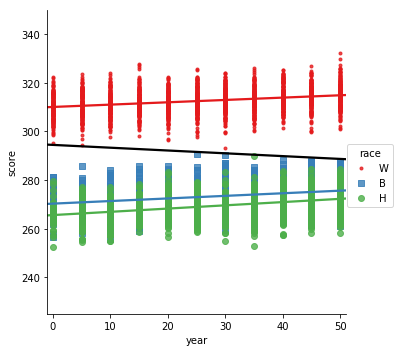

In [42]:
sp_plot(df,'year','score','race',domain_range=[-1, 51, 225, 350])

Vizually, the scatter plots for this are also somewhat different, the groups are not as separable as they were in the regression-based examples we worked with initially.  

# Generalizing this 

instead of setting a growth rate and being completely computational, we can set the start and end and then add noise in the middle

In [25]:
# set this final value
score_t = (score_0*score_growth*N_t).T
total_t = .85*total_0
count_t = total_t*np.linalg.pinv(score_t)


count = np.linspace(count_0,count_t,N_t)
share = count/np.asarray([np.sum(count, axis=1)]*3).T
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

plt.subplot(1,2,2)
plt.plot(t,count)
plt.title('count per group');

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [48]:
N_t = 11
t = np.linspace(0,50,N_t)
group_names = ['W','B','H']
`

count_0 = np.asarray([200,60,40])
count_0

share_0 = count_0/np.asarray([np.sum(count_0)]*3).T
score_0 = np.asarray([310,270,265])
score_growth = [1.1,1.3,1.4]
total_0 = np.sum(share_0*score_0)
total_0

SyntaxError: invalid syntax (<ipython-input-48-b946432f3fc2>, line 4)